MODEL IS OVER FITTING IN THIS CASE 
DOT NOT USE THIS ITS ONLY FOR LEARING PURPOSE 

ALL THE IMPORTS

In [1]:
import  numpy as np
import  keras
from keras.models import  Sequential # type: ignore
from keras.layers import Activation, Dense ,Flatten, BatchNormalization, Conv2D, MaxPool2D # type: ignore
from keras.optimizers import Adam # type: ignore
from keras.metrics import categorical_crossentropy # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

MAKE  FOLDER FOR TRAIN , VALID AND TEST DATA

In [ ]:
os.chdir('train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

for c in random.sample(glob.glob('cat*'),500):
    shutil.move(c,'train/cat')

for c in random.sample(glob.glob('dog*'),500):
    shutil.move(c,'train/dog')

for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat')

for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog')

for c in random.sample(glob.glob('cat*'),50):
    shutil.move(c,'test/cat')

for c in random.sample(glob.glob('cat*'),50):
    shutil.move(c,'test/dog')

In [2]:
train_path = 'data/cat_dog/train'
valid_path = 'data/cat_dog/valid'
test_path = 'data/cat_dog/test'

PROCESSING THE IMAGES BEFORE FEDDING IN THE  MODEL 

In [3]:
train_batch = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=  ['cat','dog'],batch_size=10)
valid_batch = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=  ['cat','dog'],batch_size=10)
test_batch = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=  ['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batch)

In [5]:
def plotimage(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img , ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#plotimage(imgs)
#print(labels)

STRUCTURE OF THE  MODEL 

In [6]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

c:\Users\RAVI PRAKASH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

COMPILING AND TRAINING THE MODEL

In [8]:
model.fit(x=train_batch,validation_data=valid_batch,epochs=10,verbose=2)

Epoch 1/10


c:\Users\RAVI PRAKASH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 14s - 141ms/step - accuracy: 0.5680 - loss: 21.9271 - val_accuracy: 0.5850 - val_loss: 9.2785
Epoch 2/10
100/100 - 12s - 123ms/step - accuracy: 0.7250 - loss: 5.2632 - val_accuracy: 0.6400 - val_loss: 4.6647
Epoch 3/10
100/100 - 15s - 146ms/step - accuracy: 0.8830 - loss: 0.7425 - val_accuracy: 0.6400 - val_loss: 3.3570
Epoch 4/10
100/100 - 14s - 144ms/step - accuracy: 0.9520 - loss: 0.2315 - val_accuracy: 0.6350 - val_loss: 2.7547
Epoch 5/10
100/100 - 14s - 142ms/step - accuracy: 0.9770 - loss: 0.0846 - val_accuracy: 0.6700 - val_loss: 2.8489
Epoch 6/10
100/100 - 14s - 142ms/step - accuracy: 0.9890 - loss: 0.0358 - val_accuracy: 0.6550 - val_loss: 2.7179
Epoch 7/10
100/100 - 14s - 143ms/step - accuracy: 0.9970 - loss: 0.0120 - val_accuracy: 0.6300 - val_loss: 2.9663
Epoch 8/10
100/100 - 14s - 143ms/step - accuracy: 0.9950 - loss: 0.0134 - val_accuracy: 0.6500 - val_loss: 2.8407
Epoch 9/10
100/100 - 14s - 145ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6550 - v

PREDICTING AND PLOTING  THE PREDICTION  TO A  CONFUSION MATRIX

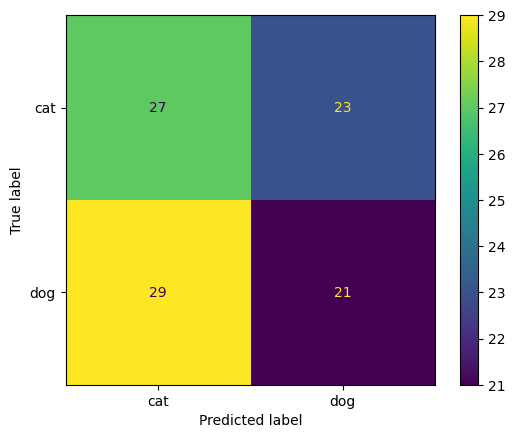

In [9]:
test_imgs, test_labels = next(test_batch)
pre = model.predict(x=test_batch,verbose=0)
np.round(pre)
cm = confusion_matrix(y_true=test_batch.classes,y_pred=np.argmax(pre,-1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['cat', 'dog'])
cm_display.plot()
plt.show()